In [2]:
import os
import zipfile
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import geopandas as gpd

AttributeError: module 'numpy.random' has no attribute 'BitGenerator'

In [3]:
download_cities = next(os.walk("/vida/work/GDPFinder/GDPFinder/data/output"))[1]
cities_shp = gpd.read_file("/vida/work/GDPFinder/GDPFinder/data/CityBoundaries.shp")
cities_shp = cities_shp.to_crs("EPSG:4326")
cities_shp["clean_name"] = cities_shp.NAME.apply(lambda x : x.lower().replace(" ", "_").replace("-", "_"))

StopIteration: 

<Axes: >

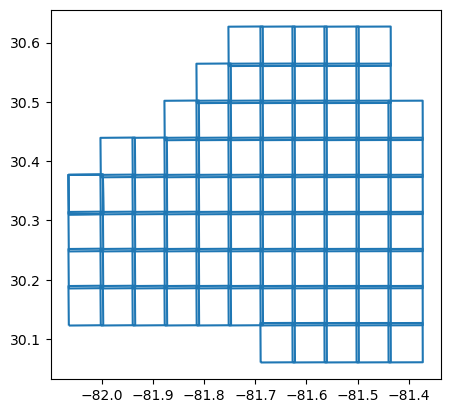

In [37]:
scenes_shp[scenes_shp.year == t].boundary.plot()

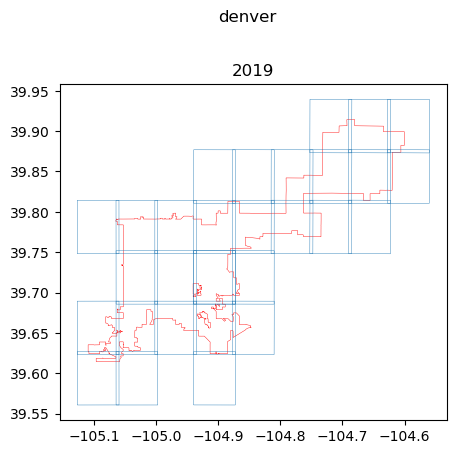

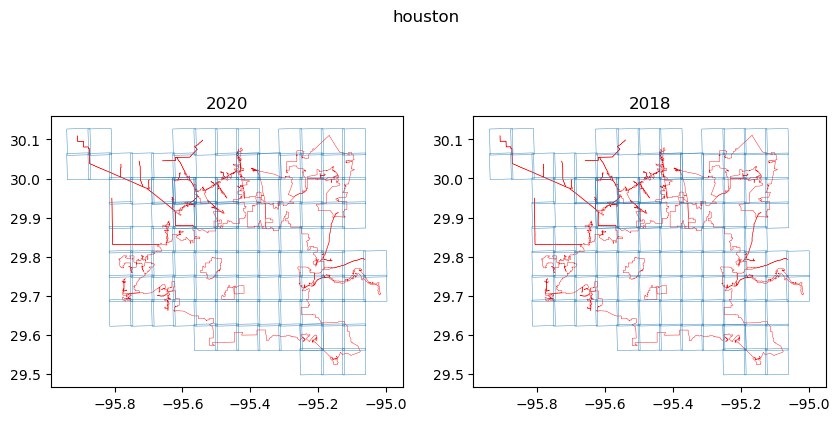

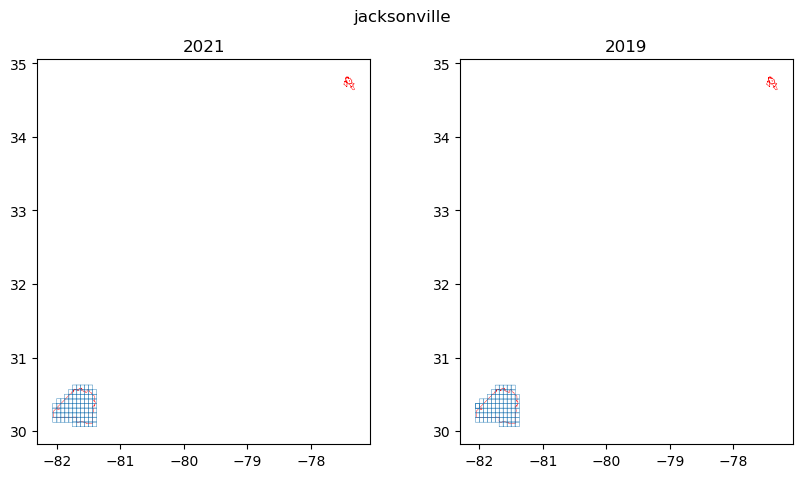

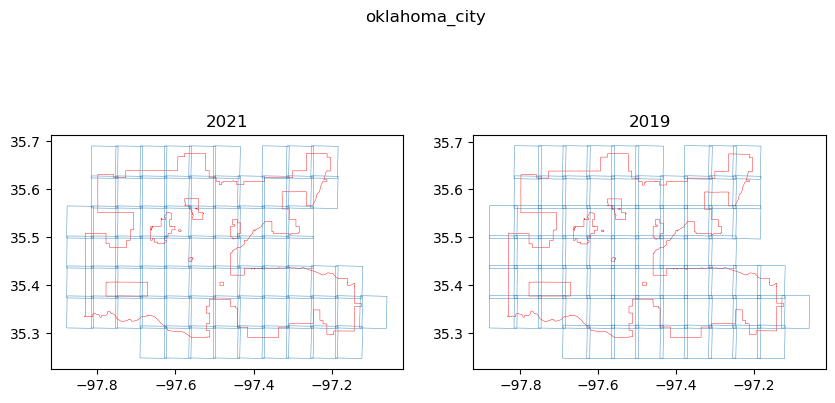

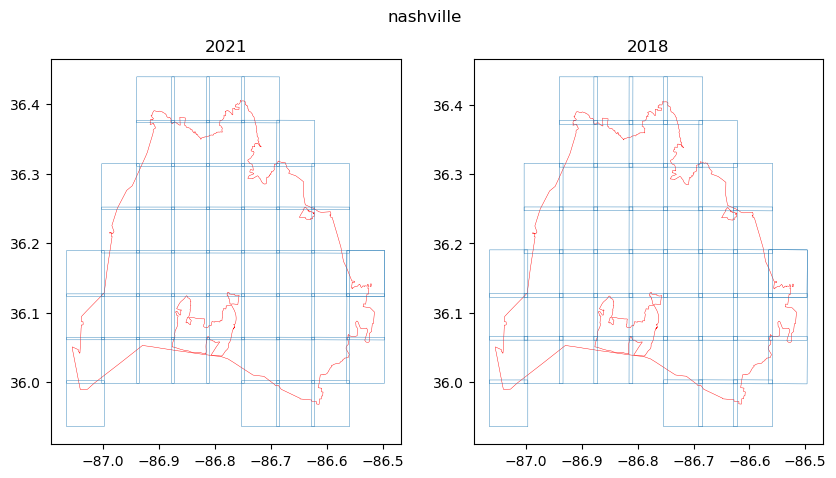

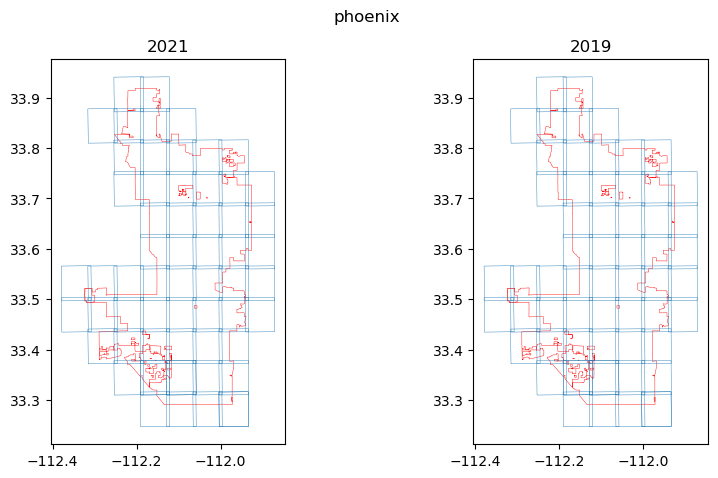

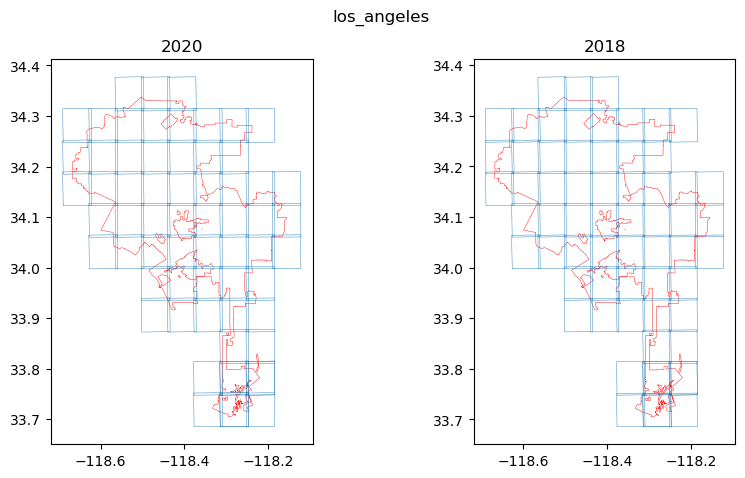

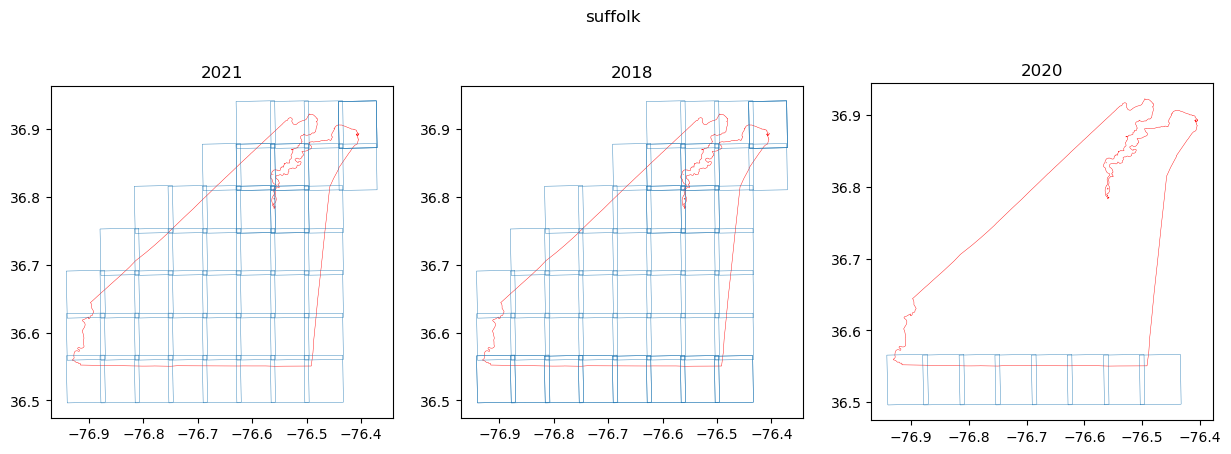

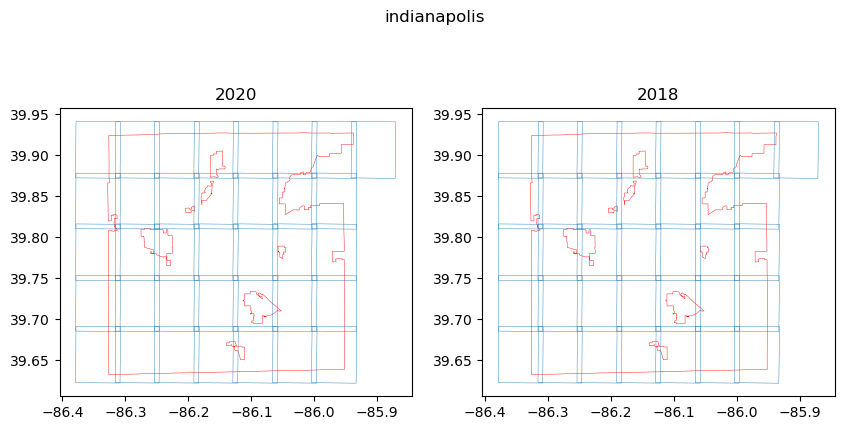

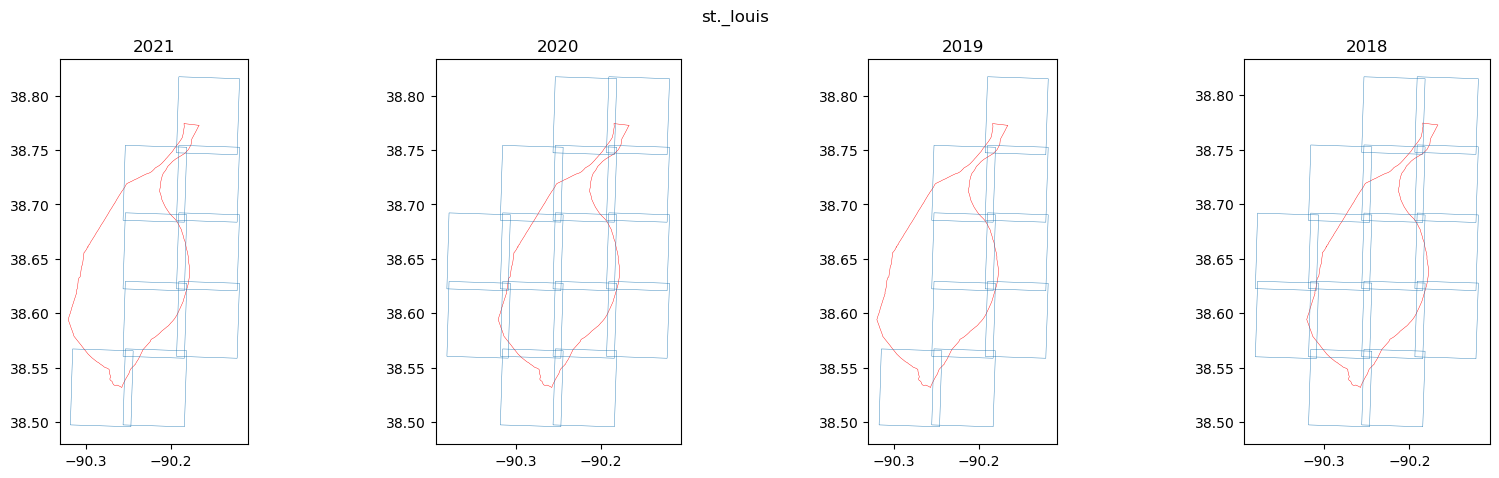

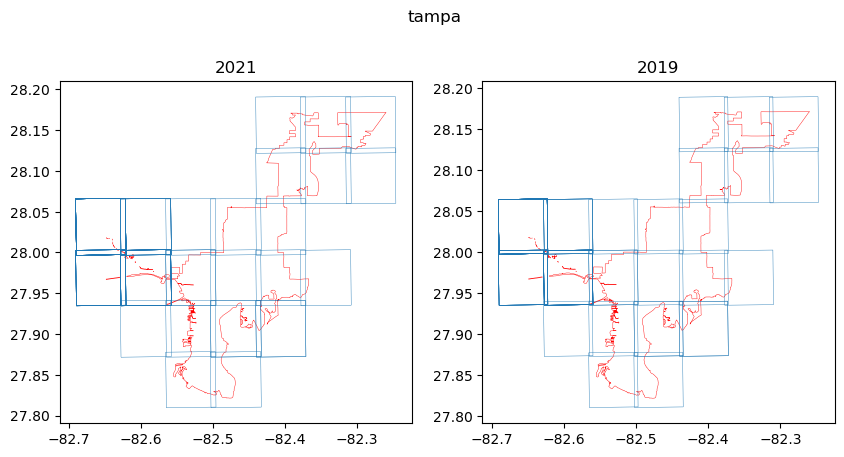

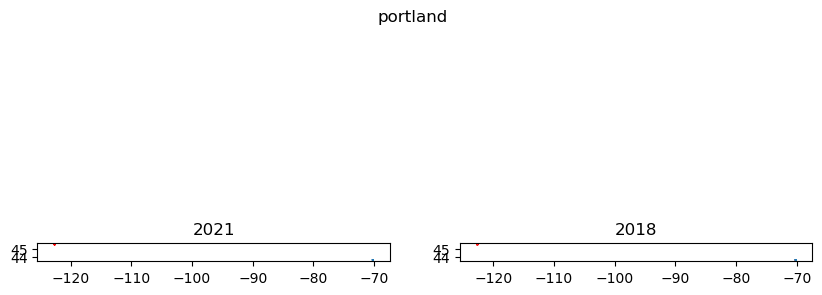

KeyboardInterrupt: 

In [38]:
for city in download_cities:
    scenes_shp = gpd.read_file(f"/vida/work/GDPFinder/GDPFinder/data/shapefiles/{city}_scenes.shp")
    scenes_shp["year"] = scenes_shp.start_date.apply(lambda x : int(x[:4])) 
    unique_years = scenes_shp.year.unique()
    n_years = len(unique_years)
    fig, axs = plt.subplots(nrows = 1, ncols = n_years, figsize = (n_years * 5, 5))
    if type(axs) == mpl.axes._axes.Axes:
        axs = [axs]
    for i, t in enumerate(unique_years):
        cities_shp[cities_shp.clean_name == city].boundary.plot(color = "r", linewidth = 0.3, ax = axs[i])
        scenes_shp[scenes_shp.year == t].boundary.plot(linewidth = 0.3, ax = axs[i])
        axs[i].set_title(t)
    plt.suptitle(city)
    plt.show()

In [10]:
print(list(os.walk("/vida/work/GDPFinder/GDPFinder/data/output")))

[('/vida/work/GDPFinder/GDPFinder/data/output', ['denver', 'houston', 'jacksonville', 'oklahoma_city', 'nashville', 'phoenix', 'los_angeles', 'suffolk', 'indianapolis', 'st._louis', 'tampa', 'portland', 'charlotte', 'austin', 'riverside', 'columbia', 'san_diego', 'detroit', 'minneapolis', 'miami', 'san_jose', 'atlanta', 'philadelphia', 'seattle', 'boston', 'arlington', 'dallas'], []), ('/vida/work/GDPFinder/GDPFinder/data/output/denver', ['M_3910410_NE_13_060_20190803'], ['M_3910409_NE_13_060_20190803.tar', 'M_3910417_NW_13_060_20190803.tar', 'M_3910412_NW_13_060_20190912.tar', 'M_3910516_SE_13_060_20190803.tar', 'M_3910417_NE_13_060_20190803.tar', 'M_3910417_NE_13_060_20190803.tar.size', 'M_3910403_SW_13_060_20190912.tar', 'M_3910417_NW_13_060_20190803.tar.size', 'M_3910404_SW_13_060_20190912.tar', 'M_3910412_NW_13_060_20190912.tar.size', 'M_3910409_SE_13_060_20190803.tar', 'M_3910516_SE_13_060_20190803.tar.size', 'M_3910411_SE_13_060_20190912.tar', 'M_3910409_NE_13_060_20190803.tar.s

In [11]:
im = Image.open("../data/output/denver/M_3910410_NE_13_060_20190803/m_3910403_se_13_060_20190912.tif")

/home/vida/gav9890/miniconda3/envs/urban_gdp/lib/python3.9/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117941200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [14]:
# redube because it is too big to matplotlib to plot
im = im.resize((160,300),Image.ANTIALIAS)

/tmp/ipykernel_7426/63224821.py:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im = im.resize((160,300),Image.ANTIALIAS)


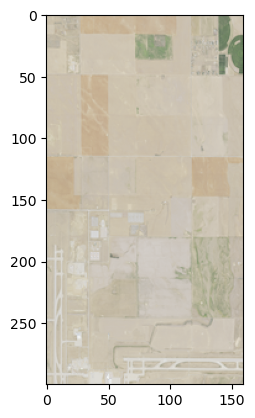

In [21]:
plt.imshow(im)
plt.show()

In [2]:
path = "/vida/work/GDPFinder/GDPFinder/data/output/houston"
output_path = "/vida/work/GDPFinder/GDPFinder/data/output/houston/unzipped"
files = os.listdir(path)
files.remove("unzipped")
files = [f for f in files if f[-4:] == ".tar"]

In [3]:
print(len(files))

89


In [5]:
files_extracted = []
files_not_extracted = []
for f in tqdm(files):
    try:
        with zipfile.ZipFile(f"{path}/{f}", mode="r") as archive:
            archive.extractall(output_path)
            files_extracted.append(f)
    except:
        files_not_extracted.append(f)
        print(f"Error rate: {len(files_not_extracted) / len(files_extracted) + len(files_not_extracted) :.2f}")

100%|██████████| 89/89 [12:04<00:00,  8.14s/it]


In [7]:
print(len(files_extracted))
print(len(files_not_extracted))

print(len(files_not_extracted)/(len(files_not_extracted) + len(files_extracted)))

89
0
0.0
